In [10]:
%matplotlib inline
import numpy as np
import sys, scipy
import matplotlib.pyplot as plt
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

sys.path.append('./src')
import similarityMatrix as sMatr
import laplacian

In [2]:
img = sMatr.getCircleMatrix() #get matrix with two circle at (28, 24) and (67, 58) with redius 16 and 5
a = sMatr.getDiagMatrix() #just regular diagonal matrix
o1 = sMatr.getOffDiagMatrix(5) #diagonal matrix with thickness at that time point
o2 = sMatr.getOffDiagMatrixII(5) #diagonal matrix with thickness along all time points
o3 = sMatr.getOffDiagMatrixIII(3,5) #diagonal matrix with thickness along all time points, with number of breaks

print (o3 == np.transpose(o3)).all() #check o3 is symmetric

True


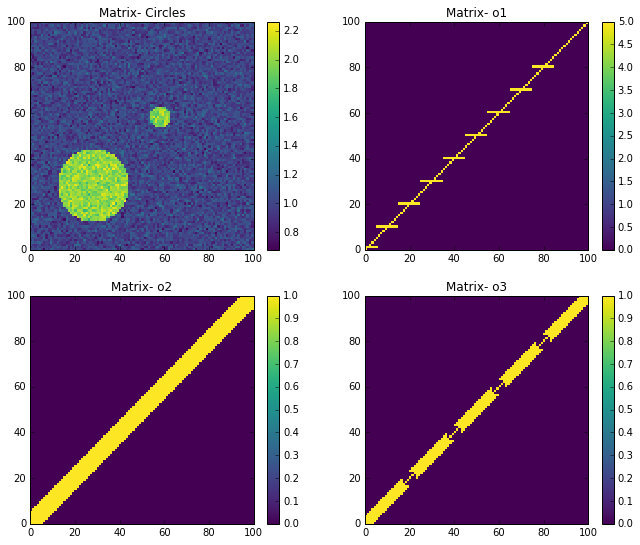

In [6]:
plt.subplot(2, 2, 1)
# R = np.corrcoef(img)
plt.pcolor(img, cmap="viridis")
plt.colorbar()
plt.title('Matrix- Circles')


plt.subplot(2, 2, 2)
# R = np.corrcoef(o1)
plt.pcolor(o1, cmap="viridis")
plt.colorbar()
plt.title('Matrix- o1')

plt.subplot(2, 2, 3)
# R = np.corrcoef(o2)
plt.pcolor(o2, cmap="viridis")
plt.colorbar()
plt.title('Matrix- o2')

plt.subplot(2, 2, 4)
# R = np.corrcoef(o3)
plt.pcolor(o3, cmap="viridis")
plt.colorbar()
plt.title('Matrix- o3')

plt.show()

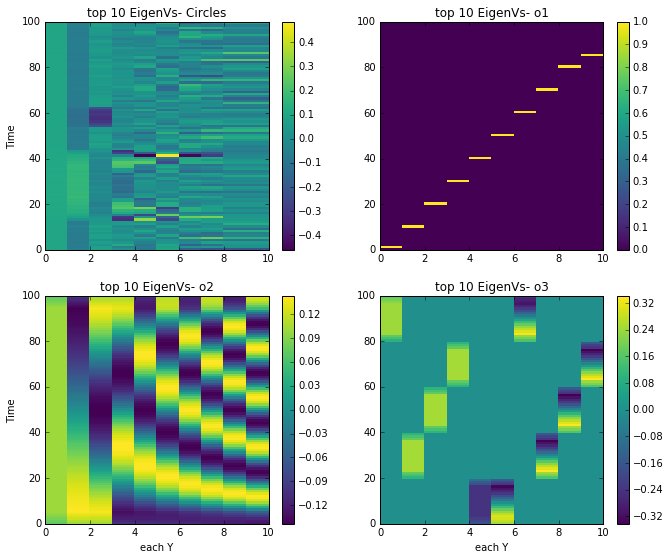

In [8]:
#basically using laplacian to get eigenvectors, and construct Y by selecting top m smallest eigenvalues
Y0 = laplacian.getNormLaplacian(img, 10) #similarity matrix, top m eigenvectors
Y1 = laplacian.getNormLaplacian(o1, 10)
Y2 = laplacian.getNormLaplacian(o2, 10)
Y3 = laplacian.getNormLaplacian(o3, 10)

plt.subplot(2, 2, 1)
plt.pcolor(Y0, cmap="viridis")
plt.colorbar()
plt.title('top 10 EigenVs- Circles')
plt.ylabel('Time')

plt.subplot(2, 2, 2)
plt.pcolor(Y1, cmap="viridis")
plt.colorbar()
plt.title('top 10 EigenVs- o1')

plt.subplot(2, 2, 3)
plt.pcolor(Y2, cmap="viridis")
plt.colorbar()
plt.title('top 10 EigenVs- o2')
plt.ylabel('Time')
plt.xlabel('each Y')

plt.subplot(2, 2, 4)
plt.pcolor(Y3, cmap="viridis")
plt.colorbar()
plt.title('top 10 EigenVs- o3')
plt.xlabel('each Y')

plt.show()

(100, 25)


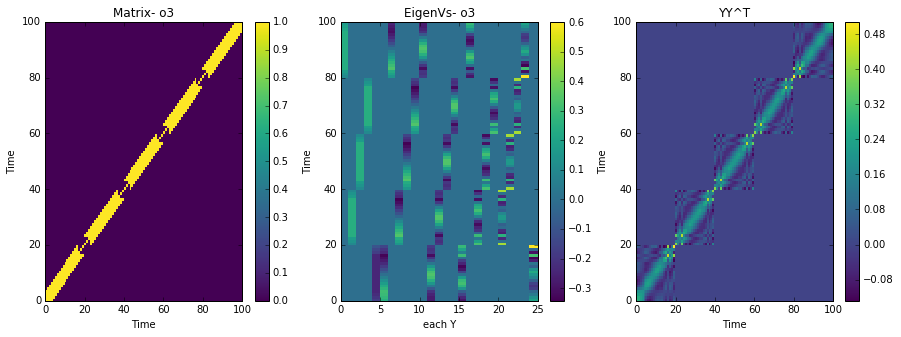

In [9]:
Y3 = laplacian.getNormLaplacian(o3, 25) #similarity matrix, top m eigenvectors
YY = np.dot(Y3[:,:], np.transpose(Y3)[:,:])
print Y3.shape

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.pcolor(o3, cmap="viridis")
plt.colorbar()
plt.title('Matrix- o3')
plt.xlabel('Time')
plt.ylabel('Time')

plt.subplot(1, 3, 2)
plt.pcolor(Y3, cmap="viridis")
plt.colorbar()
plt.title('EigenVs- o3')
plt.xlabel('each Y')
plt.ylabel('Time')

plt.subplot(1, 3, 3)
plt.pcolor(YY, cmap="viridis")
plt.colorbar()
plt.title('YY^T')
plt.ylabel('Time')
plt.xlabel('Time')
plt.show()

In [7]:
from sklearn.cluster import KMeans
nCluster = 8
Y3 = laplacian.getNormLaplacian(o3, 25) #similarity matrix, top m eigenvectors

def boundaryDetection(Y, nCluster):
    row_leng = np.linalg.norm(Y, axis=1) #get length of each row
    row_leng[row_leng==0] = 1 #replace the legth of 0 to 1
    Y_norm = Y / row_leng[:, np.newaxis]

    clf = KMeans(n_clusters=nCluster, max_iter=300).fit(Y_norm)
    centroids, labels = clf.cluster_centers_, clf.labels_

    boundary = [[] for _ in xrange(nCluster)]
    for time, label in enumerate(labels):
        boundary[label-1] +=[time]
    
    return boundary, centroids

b, c = boundaryDetection(Y3, nCluster)
print b


[[61, 62, 63, 64, 65, 66, 67, 74, 75, 77, 78], [87, 88, 89, 90, 91, 92, 93, 94, 95], [21, 22, 24, 25, 32, 33, 34, 35, 36, 37, 38], [42, 44, 45, 46, 47, 48, 49, 50], [4, 5, 6, 7, 8, 9, 10, 11], [80, 81, 82, 83, 84, 85, 86], [12, 13, 14, 15, 16, 17, 18], [0, 1, 2, 3, 19, 20, 23, 26, 27, 28, 29, 30, 31, 39, 40, 41, 43, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 68, 69, 70, 71, 72, 73, 76, 79, 96, 97, 98, 99]]
